<a href="https://colab.research.google.com/github/Nageswar-Sahoo/Computer-Vision-Project/blob/main/S9/Assignment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!git clone https://github.com/Nageswar-Sahoo/Computer-Vision-Project.git

Cloning into 'Computer-Vision-Project'...
remote: Enumerating objects: 1127, done.
remote: Counting objects: 100% (1127/1127), done.
remote: Compressing objects: 100% (910/910), done.
remote: Total 1127 (delta 713), reused 449 (delta 191), pack-reused 0
Receiving objects: 100% (1127/1127), 6.03 MiB | 13.43 MiB/s, done.
Resolving deltas: 100% (713/713), done.


In [9]:
!pip install -U git+https://github.com/albumentations-team/albumentations
import albumentations 
from albumentations.pytorch import ToTensorV2

  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-naw4y5le
  Running command git clone -q https://github.com/albumentations-team/albumentations /tmp/pip-req-build-naw4y5le


In [10]:
cd Computer-Vision-Project/template

/content/Computer-Vision-Project/template


In [11]:
from parse_config import ConfigParser
from trainer import Trainer
from utils import prepare_device
import model.loss as module_loss
import model.metric as module_metric
import torch.optim as optim
import logging
import numpy as np
import torch
import model.customresnet as module_resnet
SEED = 123
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(SEED)
import torch
import data_loader.data_loaders as data_loaders

In [12]:
    logger = logging.getLogger("trian")
    # Read the config.json
    config = ConfigParser.from_args()

    data_loader = data_loaders.get_train_data_loader(512)

    valid_data_loader = data_loaders.get_test_data_loader(512)

    # build model architecture, then print to console
    model = module_resnet.CustomResnet()

    logger.info(model)

    # prepare for (multi-device) GPU training
    n_gpu = 1
    device, device_ids = prepare_device(n_gpu)
    model = model.to(device)
    if len(device_ids) > 1:
        model = torch.nn.DataParallel(model, device_ids=device_ids)

    # get function handles of loss and metrics
    criterion = module_loss.crossentropyloss
    metrics = [module_metric.accuracy]

    optimizer = optim.Adam(model.parameters(), lr=.03, weight_decay=1e-4)
    #lr_scheduler = StepLR(optimizer, step_size=15, gamma=0.001)
    #optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    scheduler = optim.lr_scheduler.OneCycleLR(optimizer, verbose=False, three_phase=True,  max_lr=.03, pct_start=5/24, epochs=24, steps_per_epoch=len(data_loader))

    trainer = Trainer(model, criterion, metrics, optimizer,
                      config=config,
                      device=device,
                      data_loader=data_loader,
                      valid_data_loader=valid_data_loader,
                      lr_scheduler=scheduler)

/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:694: FutureWarning: This class has been deprecated. Please use CoarseDropout
  FutureWarning,


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
ResNet(
  (preplayer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv_X1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (layer1): ResidualBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, tra

In [7]:
!pip install torch-lr-finder


  0%|          | 0/24 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 7.41E-01


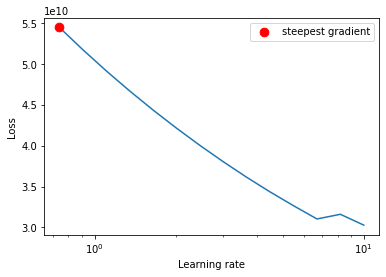

In [6]:
  from torch_lr_finder import LRFinder
  import torch.nn as nn
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=.1, weight_decay=1e-2)
  lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
  lr_finder.range_test(data_loader, val_loader=valid_data_loader, end_lr=10, num_iter=24, step_mode="exp")
  lr_finder.plot(skip_end=0)
  lr_finder.reset()

In [13]:
trainer.train()

Train Epoch: 1 last_lr_used  0.001200  [0/98 (0%)] Loss: 3.728552
Train Epoch: 1 last_lr_used  0.001357  [22/98 (22%)] Loss: 1.793159
Train Epoch: 1 last_lr_used  0.001798  [44/98 (45%)] Loss: 1.742687
Train Epoch: 1 last_lr_used  0.002514  [66/98 (67%)] Loss: 1.510625
Train Epoch: 1 last_lr_used  0.003490  [88/98 (90%)] Loss: 1.487778
    epoch          : 1
    loss           : 1.7804641577662255
    accuracy       : 36.328599520165206
    val_loss       : 1.3241092622280122
    val_accuracy   : 51.97552849264706
Saving checkpoint: saved/models/CIFR10/1205_135958/checkpoint-epoch1.pth ...
Saving current best: model_best.pth ...
Train Epoch: 2 last_lr_used  0.004016  [0/98 (0%)] Loss: 1.451329
Train Epoch: 2 last_lr_used  0.005336  [22/98 (22%)] Loss: 1.385200
Train Epoch: 2 last_lr_used  0.006861  [44/98 (45%)] Loss: 1.240560
Train Epoch: 2 last_lr_used  0.008561  [66/98 (67%)] Loss: 1.364700
Train Epoch: 2 last_lr_used  0.010401  [88/98 (90%)] Loss: 1.164342
    epoch          : 2
  

0
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


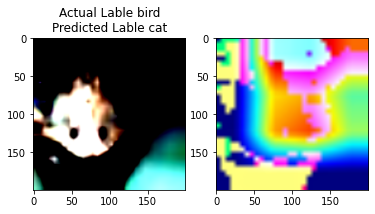

1
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


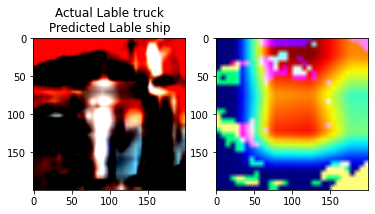

2
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


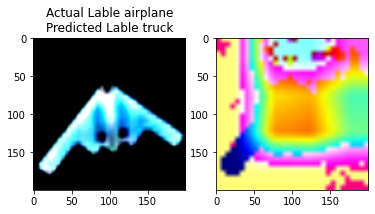

3
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


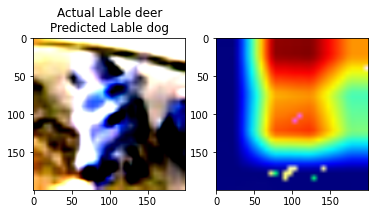

4
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


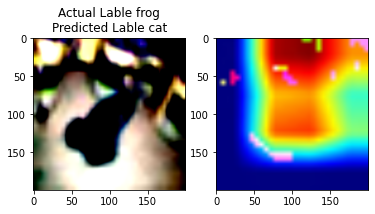

5
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


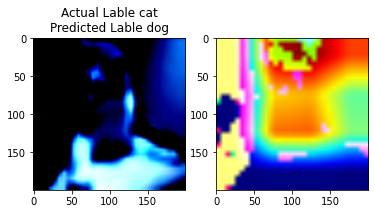

6
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


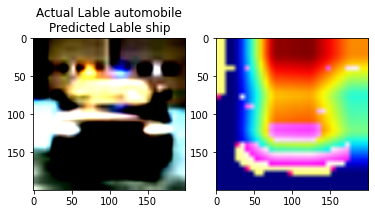

7
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


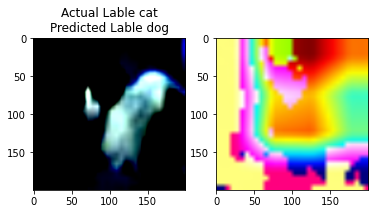

8
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


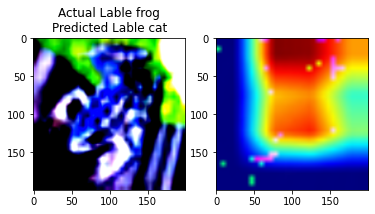

9
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


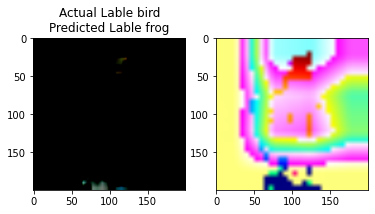

10
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


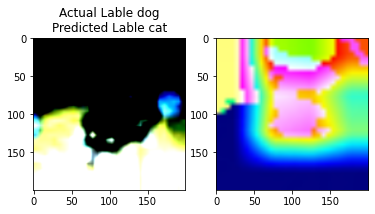

11
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


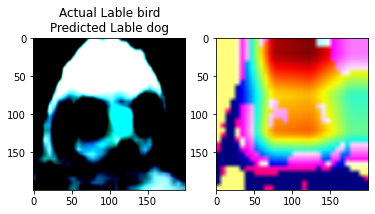

12
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


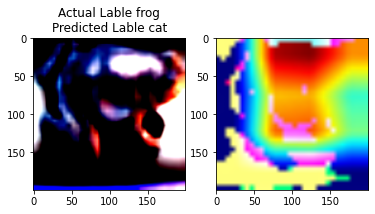

13
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


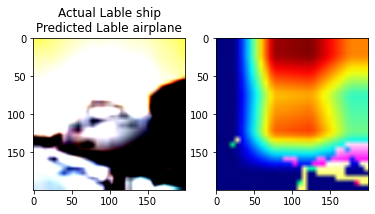

14
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


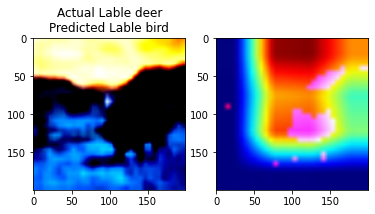

15
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


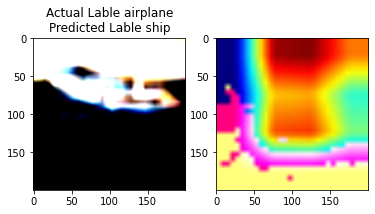

16
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


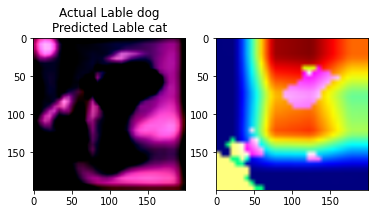

17
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


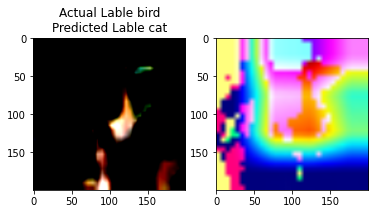

18
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


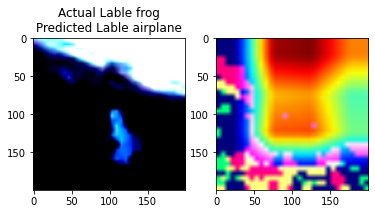

19
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


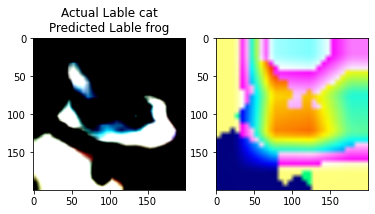

In [19]:
utils.showandcam_missclassifiedimage(trainer)


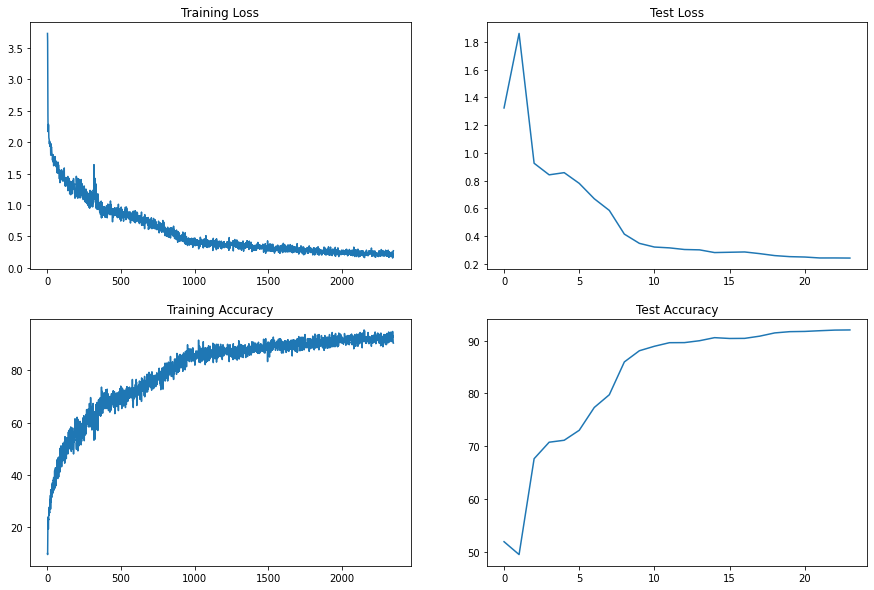

In [18]:
utils.showaccuracy_and_loss_curve(trainer)